In [2]:
import tensorflow as tf
import numpy as np
import pickle, os

In [8]:
PICKLE_DIR = './data/A2009/'
train_file = os.path.join(PICKLE_DIR, 'A2009_train_default_0000.pkl')
test_file = os.path.join(PICKLE_DIR, 'A2009_test_default_0000.pkl')

with open(test_file, 'rb') as f:
    data = pickle.load(f)
    
data

{'num_skills': 111,
 'num_steps': 731,
 'students': [([16],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1]),
  ([17],
   [6, 6, 6, 10, 9, 9, 9, 8, 9, 9, 10, 6, 6, 6, 6, 13, 13],
   [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
  ([5], [39, 39, 39, 39, 46], [0, 1, 1, 1, 1]),
  ([6], [2, 2, 0, 0, 0, 0], [1, 1, 0, 1, 1, 1]),
  ([23],
   [50,
    50,
    34,
    50,
    40,
    40,
    40,
    34,
    69,
    69,
    69,
    69,
    69,
    69,
    69,
    70,
    70,
    70,
    70,
    70,
    72,
    72,
    72],
   [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
  ([77],
   [87,
    87,
    87,
    87,
    87,
    87,
    30,
    31,
    31,
    31,
    31,
    31,
    28,
    28,
    28,
    28,
    28,
    28,
    28,
    37,
    37,
    37,
    37,
    37,
    37,
    30,
    30,
    30,
    30,
    30,
    28,
    28,
    28,
    28,
    28,
    72,
    72,
    72,
    72,
    72,
    35,
    

In [2]:
def seq_corr_to_onehot(seq, corr, num_steps, num_problems):
    seq_oh = tf.one_hot(seq, depth=num_problems)
    seq_oh_flat = tf.reshape(seq_oh, [-1, num_problems])
    
    # element-wise multiplication between Matrix and Vector
    # the i-th column of Matrixelement-wisedly multiply the i-th element in the Vector
    corr_flat = tf.reshape(corr, [-1])
    corr_mat = tf.multiply(tf.transpose(seq_oh_flat), tf.cast(corr_flat, dtype=tf.float32))
    corr_mat = tf.transpose(corr_mat)
    corr_mat = tf.reshape(corr_mat, shape=[-1, num_steps, num_problems])
    
    corr_mat_value_two = corr_mat * 2
    
    X = corr_mat_value_two - seq_oh
    
    return seq_oh, corr_mat, X

In [3]:
with tf.Session():
    inputs_seq = np.array([1, 3, 1, 2, 2])
    inputs_corr = np.array([0, 1, 1, 0, 0])
    num_steps = 5
    num_problems = 5
    X_seq, X_corr, X = seq_corr_to_onehot(inputs_seq, inputs_corr, num_steps, num_problems)
    
    
    print(X_seq.eval())
    print(X_corr.eval())
    print(X.eval())
                           

[[ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]]
[[[ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  1.  0.]
  [ 0.  1.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]]]
[[[ 0. -1.  0.  0.  0.]
  [ 0.  0.  0.  1.  0.]
  [ 0.  1.  0.  0.  0.]
  [ 0.  0. -1.  0.  0.]
  [ 0.  0. -1.  0.  0.]]]


In [3]:
test_auc_v2 = [0.7717, 0.79113, 0.80031, .80366, .808, .80957, .81121,
           .81041, .81076, .81417, .81375, 0.81561, .81528, .81637, .8129,
           .81567, .81418, .81347, .81554, .81457, .81277, .81336, 
           .81009, .80954, .81269]

test_auc_v1 = [0.7407, 0.76954, 0.78276,0.79058, 0.79748, 0.8008,
              0.80528, 0.80584, 0.80985, 0.81029, 0.81104, 0.81355,
              0.81339, 0.81442, 0.81444, 0.81567, 0.81576, 0.81645,
              0.81656, 0.81576, 0.8167, 0.81646, 0.81776, 0.81636,
              0.81645]

len(test_auc_v1), len(test_auc_v2)

(25, 25)

In [8]:
import plotly.plotly as py
import plotly.graph_objs as go

x = np.array(range(25))
y1 = np.array(test_auc_v1)
y2 = np.array(test_auc_v2)

trace0 = go.Scatter(
    x=x,
    y=y1,
    name = 'old input representation',
    mode = 'lines+markers'
)

trace1 = go.Scatter(
    x=x,
    y=y2,
    name = 'new input representation',
    mode = 'lines+markers'
)

data = [trace0, trace1]
py.iplot(data, filename='test_auc')

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

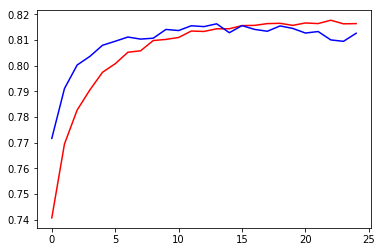

In [9]:
import matplotlib.pyplot as plt

x = np.array(range(25))
y1 = np.array(test_auc_v1)
y2 = np.array(test_auc_v2)

plt.plot(x, y1, 'r', x, y2, 'b')
plt.show()

In [5]:
with tf.Session():
    x = np.array([[[0,0,1,0,0], [0,1,0,0,0], [0,0,0,0,0], [0,0,0,0,0]]])
    print(tf.reduce_max(x, axis=2).eval())

[[1 1 0 0]]


In [5]:
np.array([1,3,5]).reshape((1,3))

array([[1, 3, 5]])